In [29]:
import pandas as pd
import numpy as np

dfPlayers = pd.read_csv("final_data.csv")
dfPlayers.columns

Index(['player', 'team', 'name', 'position', 'height', 'age', 'appearance',
       'goals', 'assists', 'yellow cards', 'second yellow cards', 'red cards',
       'goals conceded', 'clean sheets', 'minutes played', 'days_injured',
       'games_injured', 'award', 'current_value', 'highest_value',
       'position_encoded', 'winger'],
      dtype='object')

# Selecting Prediction Target as current_value

In [30]:
y = dfPlayers.loc[:, ["current_value"]]

# Selecting Features

In [31]:
features = ["height", "age", "appearance", "goals", "assists", "yellow cards", "second yellow cards", "red cards", "goals conceded", "clean sheets", "minutes played", "days_injured", "games_injured", "position_encoded", "winger"]

x = dfPlayers.loc[:, features]
x.head()


,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,position_encoded,winger
0,189.0,32.0,104,0.000000,0.000000,0.009585,0.0,0.0,1.217252,0.335463,9390,42,5,1,0
1,196.0,30.0,15,0.000000,0.000000,0.069018,0.0,0.0,1.242331,0.207055,1304,510,58,1,0
2,188.0,37.0,4,0.000000,0.000000,0.000000,0.0,0.0,0.616438,0.924658,292,697,84,1,0
3,175.0,25.0,82,0.028090,0.056180,0.224719,0.0,0.0,0.000000,0.000000,6408,175,22,2,0
4,191.0,30.0,63,0.017889,0.017889,0.053667,0.0,0.0,0.000000,0.000000,5031,238,51,2,0


In [32]:
x.describe()

,height,age,appearance,goals,assists,yellow cards,second yellow cards,red cards,goals conceded,clean sheets,minutes played,days_injured,games_injured,position_encoded,winger
count,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000,10754.000000
mean,181.240353,26.041903,36.407011,0.125554,0.086978,0.189757,0.004666,0.006826,0.131655,0.044881,2470.789381,117.961689,15.826297,2.713223,0.307513
std,6.969818,4.777629,26.526541,0.235585,0.143351,0.432388,0.025232,0.081143,0.442335,0.924437,2021.703271,175.206827,23.383606,0.986356,0.461485
min,156.000000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,176.000000,22.000000,12.000000,0.000000,0.000000,0.053191,0.000000,0.000000,0.000000,0.000000,660.000000,0.000000,0.000000,2.000000,0.000000
50%,181.240353,26.000000,35.000000,0.045969,0.040773,0.150250,0.000000,0.000000,0.000000,0.000000,2101.500000,37.000000,5.000000,3.000000,0.000000
75%,186.000000,29.000000,59.000000,0.172263,0.133136,0.248276,0.000000,0.000000,0.000000,0.000000,3968.000000,181.000000,24.000000,4.000000,1.000000
max,206.000000,43.000000,107.000000,11.250000,4.000000,30.000000,1.000000,6.923077,9.000000,90.000000,9510.000000,2349.000000,339.000000,4.000000,1.000000


In [33]:

import sklearn
from sklearn.tree import DecisionTreeRegressor

model = DecisionTreeRegressor(random_state=1)

## Fitting the data

model.fit(x,y)

DecisionTreeRegressor(random_state=1)

# Showing Model

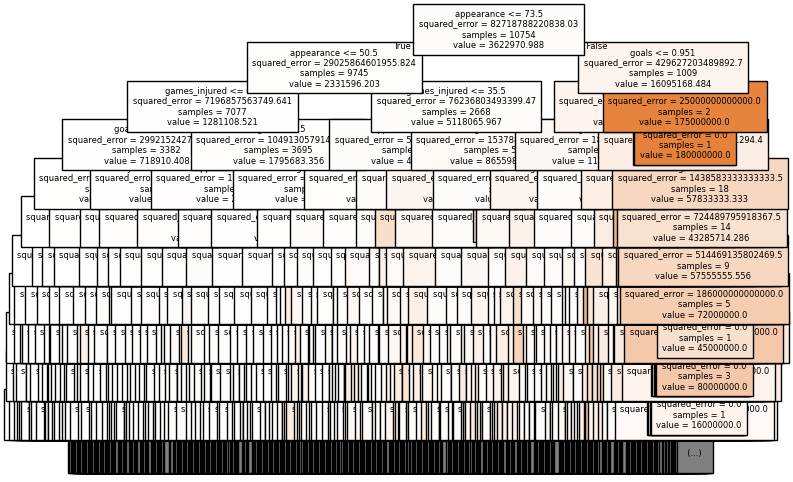

In [34]:
from sklearn.tree import plot_tree
import  matplotlib.pyplot as plt

plt.figure(figsize=(8, 6), dpi=100)
plot_tree(model, max_depth=10, feature_names=x.columns, fontsize= 6, filled=True)
plt.show()

# Prediction    

In [35]:
print("First Few players")
print(x.head())
print("Value predictions for players")
print(model.predict(x.head()))

First Few players
   height   age  appearance     goals   assists  yellow cards  \
0   189.0  32.0         104  0.000000  0.000000      0.009585   
1   196.0  30.0          15  0.000000  0.000000      0.069018   
2   188.0  37.0           4  0.000000  0.000000      0.000000   
3   175.0  25.0          82  0.028090  0.056180      0.224719   
4   191.0  30.0          63  0.017889  0.017889      0.053667   

   second yellow cards  red cards  goals conceded  clean sheets  \
0                  0.0        0.0        1.217252      0.335463   
1                  0.0        0.0        1.242331      0.207055   
2                  0.0        0.0        0.616438      0.924658   
3                  0.0        0.0        0.000000      0.000000   
4                  0.0        0.0        0.000000      0.000000   

   minutes played  days_injured  games_injured  position_encoded  winger  
0            9390            42              5                 1       0  
1            1304           510       

# Mean Absolute Value Metric is picked

In [36]:
from sklearn.metrics import mean_absolute_error

y_pred = model.predict(x)
print("MAE")
print(mean_absolute_error(y, y_pred))

MAE
796.2153617258695


In [37]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, test_size= 0.2, random_state=1)

In [38]:
# Rebuilding model

mdlDtr = DecisionTreeRegressor(random_state=1)
mdlDtr.fit(x_train, y_train)

y_test_pred = mdlDtr.predict(x_test)

print("MAE after train test split")
print(mean_absolute_error(y_test, y_test_pred))


MAE after train test split
3909632.53525492


# Different Depth for decision tree

In [39]:
# Function to build and return MAE for a given number of max_leaf_nodes
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):
    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)
    mdlDtrMlbDpt.fit(X_trn,y_trn)
    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return(mae)

In [41]:
# Iterate over a list of max_leaf_nodes to determine MAE across all
for i in [5, 50, 500, 50000, 500000, 5000000]:
    mae = get_mae(i, x_train, x_test, y_train, y_test)
    print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  3423045.679115105
Max leaf nodes:  50 	 Mean Absolute Error:  3182656.230362994
Max leaf nodes:  500 	 Mean Absolute Error:  3484052.785924475
Max leaf nodes:  50000 	 Mean Absolute Error:  3830541.414845808
Max leaf nodes:  500000 	 Mean Absolute Error:  3830541.414845808
Max leaf nodes:  5000000 	 Mean Absolute Error:  3830541.414845808


In this case best depth is 50 with value 3182656.230362994

## Random Forest Method

In [42]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=1)
model.fit(x_train, y_train)
y_test_pred = model.predict(x_test)

print("MAE (Random Forrest)")
print(mean_absolute_error(y_test,y_test_pred))

C:\Users\90543\PycharmProjects\IE423\venv\lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


MAE (Random Forrest)
3083017.9328920473


## Comparision

Random Forrest method is better in the case of this model

* MAE of Random Forrest lower than the Decision Tree Method
* Different columns can be added later on the data. For example if we happened to add new column name **speed**. Now previous data has no column name **speed**. For Decision tree method it is big problem. But with Random Forrest method this is a lesser problem for the data with multiple trees.